## Fluence Rate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import datetime
from matplotlib import rc

%matplotlib inline
rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (5.5, 4)

In [2]:
#sns.set()
#sns.set_context("paper")

Computed using Keane and Petroff 2014

In [3]:
# From Minimum flux density detection, based on radiometer equation
SEFD = 3. # Jy, SEFD of ALFA (main beam)
threshold = 10. # SNR threshold of detection pipeline
pulseWidth = 2.**(np.arange(0,7)) * 256. # us, expected pulse width
#pulseWidth = np.array([256., 1024., 4096., 4.*4096]) # us, expected pulse width
tRes = 256. # us, ALFABURST spectra time resolution
dFactor = pulseWidth / tRes# decimation factor
bw = 56. * 1e6 # ALFABURST effective bandwidth in Hz
#bw = 6. * 56. * 1e6 # ALFABURST effective bandwidth in Hz
sMin = SEFD * (threshold / np.sqrt(dFactor * (tRes * 1e-6) * bw))

In [4]:
for sMinVal, pwVal in zip(sMin, pulseWidth):
    print '\t %.1f mJy for a pulse width of %.0f us'%(sMinVal*1000., pwVal)

	 250.6 mJy for a pulse width of 256 us
	 177.2 mJy for a pulse width of 512 us
	 125.3 mJy for a pulse width of 1024 us
	 88.6 mJy for a pulse width of 2048 us
	 62.6 mJy for a pulse width of 4096 us
	 44.3 mJy for a pulse width of 8192 us
	 31.3 mJy for a pulse width of 16384 us


In [5]:
sMax = 32. * 2.**(np.arange(0,7)) # Jy, the conservative RFI clipper upper limit
print sMax

[   32.    64.   128.   256.   512.  1024.  2048.]


In [6]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

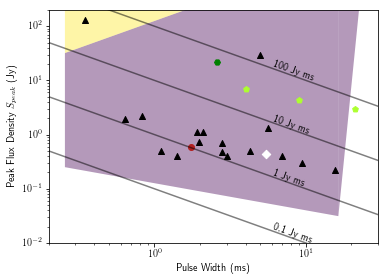

In [9]:
fig, ax = plt.subplots()

patches = []

# ALFABURST sensitivty range
polygon = Polygon(np.array([[256., 250.6], [16384., 31.3], [16384., 2048.*1000.], [256., 32.*1000.]])/1000., True)
patches.append(polygon)

# region of possible RFI clipping
polygon = Polygon(np.array([[256., 32.*1000.], [16384., 2048.*1000.], [256., 2048.*1000.]])/1000., True)
patches.append(polygon)

# wide pulse region that see a loss in SNR due to maximum time binning
polygon = Polygon(np.array([[16384., 31.3], [16384. + 8006., 2048.*1000.], [16384., 2048.*1000.]])/1000., True)
patches.append(polygon)

#colors = 100*np.random.rand(len(patches))
#print colors
colors = [40., 80., 40.]
p = PatchCollection(patches, alpha=0.4)
p.set_array(np.array(colors))
ax.add_collection(p)

# constant fluence lines
widthRange = np.logspace(-1, 2, num=20) # ms
fluenceRange = [0.1, 1., 10., 100.] # Jy ms
for flu in fluenceRange:
    sens = flu / widthRange
    plt.plot(widthRange, sens, 'k', alpha=0.5)
    if flu < 1.: plt.text(6., sens[-9], '%.1f Jy ms'%flu, rotation=-20)
    else: plt.text(6., sens[-9], '%.0f Jy ms'%flu, rotation=-20)

# detected FRBs
FRBdict = {
    'FRB010125': {'width':9.40, 'speak':0.30, 'telescope':'parkes'},
    'FRB010621': {'width':7.00, 'speak':0.41, 'telescope':'parkes'}, 
    'FRB010724': {'width':5.00, 'speak':30.0, 'telescope':'parkes'},
    'FRB090625': {'width':1.92, 'speak':1.14, 'telescope':'parkes'},
    'FRB110220': {'width':5.60, 'speak':1.30, 'telescope':'parkes'},
    'FRB110523': {'width':1.73, 'speak':0.60, 'telescope':'gbt'},
    'FRB110626': {'width':1.40, 'speak':0.40, 'telescope':'parkes'},  
    'FRB110703': {'width':4.30, 'speak':0.50, 'telescope':'parkes'},  
    'FRB120127': {'width':1.10, 'speak':0.50, 'telescope':'parkes'},  
    'FRB121002': {'width':5.44, 'speak':0.43, 'telescope':'arecibo'},
    'FRB121102': {'width':3.00, 'speak':0.40, 'telescope':'parkes'},
    'FRB130626': {'width':1.98, 'speak':0.74, 'telescope':'parkes'},
    'FRB130628': {'width':0.64, 'speak':1.91, 'telescope':'parkes'},
    'FRB130729': {'width':15.61, 'speak':0.22, 'telescope':'parkes'},
    'FRB131104': {'width':2.08, 'speak':1.12, 'telescope':'parkes'},
    'FRB140514': {'width':2.80, 'speak':0.47, 'telescope':'parkes'},
    'FRB150215': {'width':2.80, 'speak':0.70, 'telescope':'parkes'},
    'FRB150418': {'width':0.83, 'speak':2.19, 'telescope':'parkes'},
    'FRB150807': {'width':0.35, 'speak':128., 'telescope':'parkes'},
    'FRB160317': {'width':21.0, 'speak':3.00, 'telescope':'utmost'},
    'FRB160410': {'width':4.00, 'speak':7.00, 'telescope':'utmost'},
    'FRB160608': {'width':9.00, 'speak':4.30, 'telescope':'utmost'},
    'FRB170107': {'width':2.60, 'speak':22.3, 'telescope':'askap'}
}
for key in FRBdict:
    if FRBdict[key]['telescope'].startswith('gbt'):
        plt.scatter(FRBdict[key]['width'], FRBdict[key]['speak'], c='firebrick', marker='o')
    elif FRBdict[key]['telescope'].startswith('arecibo'):
        plt.scatter(FRBdict[key]['width'], FRBdict[key]['speak'], c='w', marker='D')
    elif FRBdict[key]['telescope'].startswith('utmost'):
        #plt.scatter(FRBdict[key]['width'], FRBdict[key]['speak'], c='teal', marker='p')
        plt.scatter(FRBdict[key]['width'], FRBdict[key]['speak'], c='greenyellow', marker='p')
    elif FRBdict[key]['telescope'].startswith('askap'):
        plt.scatter(FRBdict[key]['width'], FRBdict[key]['speak'], c='g', marker='H')
    elif FRBdict[key]['telescope'].startswith('parkes'):
        plt.scatter(FRBdict[key]['width'], FRBdict[key]['speak'], c='k', marker='^')

ax.set_xscale("log")
ax.set_yscale("log")
plt.ylim(0.01, 200.)
plt.xlim(0.2, 30.)

plt.ylabel('Peak Flux Density $S_{peak}$ (Jy)')
plt.xlabel('Pulse Width (ms)')

plt.tight_layout()
plt.savefig('fluence_rate.pdf')